Train MSE: 0.2507, R2: 0.9129
Test MSE: 0.2511, R2: 0.9129


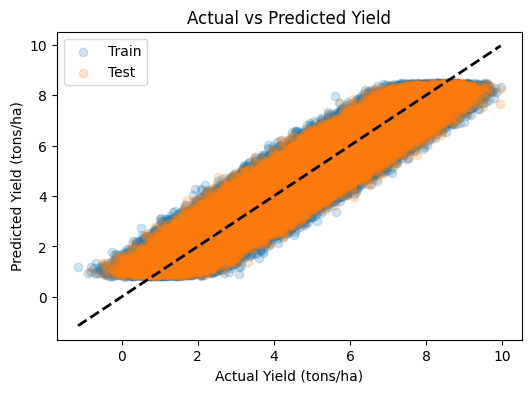

Decision Tree Test MSE: 0.5324, R2: 0.8153
Random Forest Test MSE: 0.2670, R2: 0.9074
Best Model: SGDRegressor with R2: 0.9129
Best model, scaler, and label encoders saved for FastAPI deployment.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load dataset
df = pd.read_csv('crop_yield.csv')

# Encode categorical variables
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Fill missing values with False (0) before conversion
df['Fertilizer_Used'] = df['Fertilizer_Used'].fillna(False).astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].fillna(False).astype(int)

# Features and target
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression with SGD (Gradient Descent)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)
y_pred_train = sgd_reg.predict(X_train_scaled)
y_pred_test = sgd_reg.predict(X_test_scaled)

# Evaluation
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse:.4f}, R2: {train_r2:.4f}')
print(f'Test MSE: {test_mse:.4f}, R2: {test_r2:.4f}')

# Loss curve plot
plt.figure(figsize=(6,4))
plt.scatter(y_train, y_pred_train, alpha=0.2, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.2, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Yield (tons/ha)')
plt.ylabel('Predicted Yield (tons/ha)')
plt.title('Actual vs Predicted Yield')
plt.legend()
plt.show()

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)
dt_pred = dt_reg.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f'Decision Tree Test MSE: {dt_mse:.4f}, R2: {dt_r2:.4f}')

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_scaled, y_train)
rf_pred = rf_reg.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f'Random Forest Test MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}')

# Select best model based on R2
models = {'SGDRegressor': sgd_reg, 'DecisionTree': dt_reg, 'RandomForest': rf_reg}
r2_scores = {'SGDRegressor': test_r2, 'DecisionTree': dt_r2, 'RandomForest': rf_r2}
best_model_name = max(r2_scores, key=r2_scores.get)
best_model = models[best_model_name]
print(f'Best Model: {best_model_name} with R2: {r2_scores[best_model_name]:.4f}')

# Save the best model and scaler for FastAPI
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print('Best model, scaler, and label encoders saved for FastAPI deployment.')

In [15]:
# Saving model, scaler, and label encoders for FastAPI deployment

import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor  # or RandomForestRegressor

# Assuming your dataframe is `df`, X and y already defined

# 1️⃣ Label encode categorical columns
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 2️⃣ Split X and y again after encoding
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# 3️⃣ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Train your model
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_scaled, y)

# 5️⃣ Save the trained model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# 6️⃣ Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 7️⃣ Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print("Model, scaler, and label encoders saved and ready for FastAPI deployment.")

✅ Model, scaler, and label encoders saved and ready for FastAPI deployment.


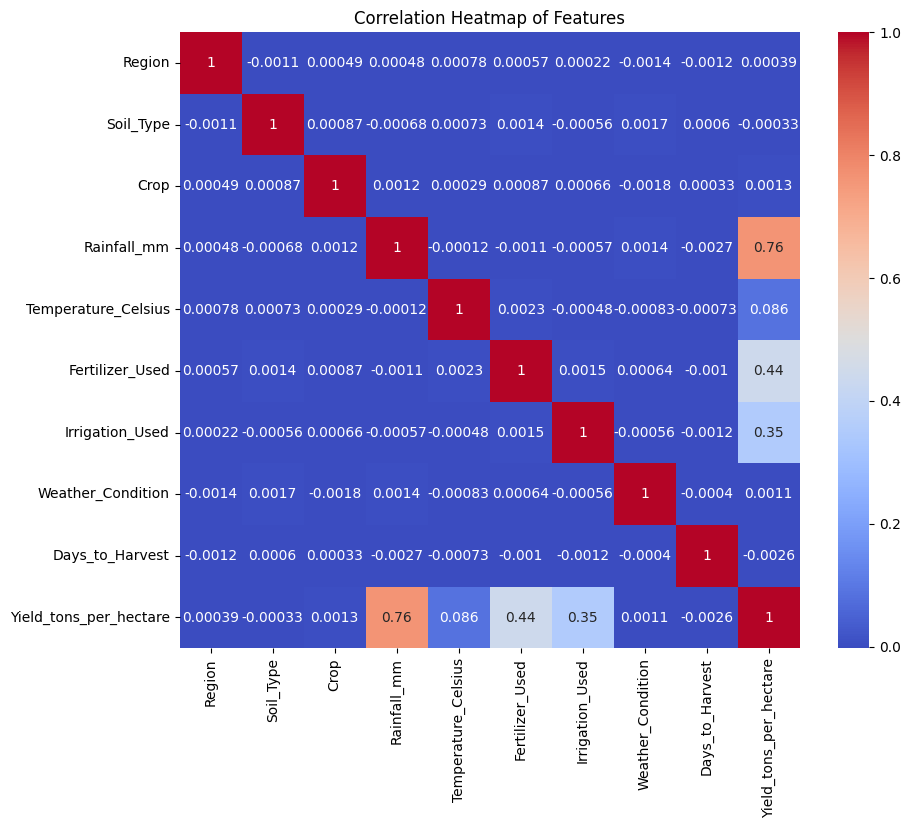

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

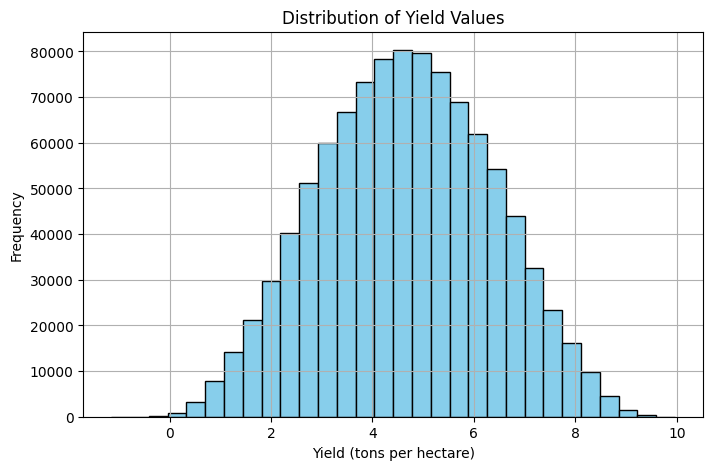

In [12]:
# Feature distribution (histogram)
plt.figure(figsize=(8,5))
df['Yield_tons_per_hectare'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Yield (tons per hectare)')
plt.ylabel('Frequency')
plt.title('Distribution of Yield Values')
plt.show()